# Ryan Cooper Project 2 Part 2 Questions Answered

This notebook examines the 2021-2024 Los Angeles Lakers regular season data. Ryan Cooper, 4/8/2025

These first  4 blocks of code are used to scrape the data from the website and transform it into datasets so we can analyze.

In [127]:
years=list(range(2020,2025))

In [128]:
url_start = "https://www.basketball-reference.com/teams/LAL/2024.html"

In [129]:
import requests  # Import the requests module to fetch web data

# Loop through each year in the 'years' list
for year in years:
    url = url_start.format(year)  # Format the URL with the current year
    data = requests.get(url)  # Send a GET request to the URL and get the response data

    # Open the file "2021.html" (change the year as needed) for reading
    with open("LakersNBA/2021.html", encoding="utf-8") as f:
        page = f.read()  # Read the content of the HTML file into the 'page' variable


In [130]:
import pandas as pd  # Import pandas for handling data in DataFrame format
from bs4 import BeautifulSoup  # Import BeautifulSoup for parsing HTML
from io import StringIO  # Import StringIO to handle HTML as a string

all_stats = {}  # Create an empty dictionary to store the DataFrames for each year

# Loop through each year from 2021 to 2024
for year in range(2021, 2025):
    filename = f"LakersNBA/{year}.html"  # Define the filename based on the year
    with open(filename, encoding="utf-8") as f:  # Open the HTML file for the current year
        html = f.read()  # Read the contents of the file into the 'html' variable

    soup = BeautifulSoup(html, "html.parser")  # Parse the HTML content with BeautifulSoup
    table = soup.find("table", id="per_game_stats")  # Find the table with id 'per_game_stats'

    if table:  # If the table is found in the HTML
        df = pd.read_html(StringIO(str(table)))[0]  # Read the HTML table into a DataFrame
        df["Season"] = year  # Add a new column for the season (year)
        all_stats[year] = df  # Store the DataFrame in the dictionary with the year as the key


# Do the players on the Los Angeles Lakers have more assists per game the older they are during the 2021-2024 regular season games?

Correlation between age and assists: 0.43


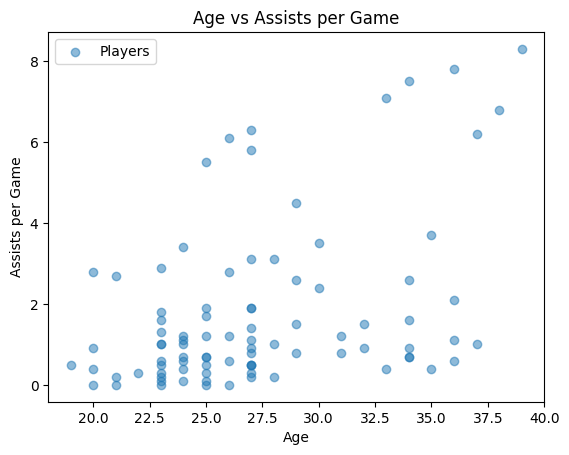

In [131]:
import pandas as pd
import numpy as np

age_list = []  # List to store ages
assists_list = []  # List to store assists

# Loop through each year from 2021 to 2024
for year in range(2021, 2025):
    df = all_stats[year]  # Get the DataFrame for the current year
    
    df['age'] = pd.to_numeric(df['Age'], errors='coerce')  # Convert age to numeric, handling errors
    df['ast'] = pd.to_numeric(df['AST'], errors='coerce')  # Convert assists to numeric, handling errors
    
    df_clean = df.dropna(subset=['age', 'ast'])  # Drop rows where age or assists are missing
    
    age_list.extend(df_clean['age'].tolist())  # Add cleaned age data to the list
    assists_list.extend(df_clean['ast'].tolist())  # Add cleaned assists data to the list

# Create a DataFrame from the age and assists lists
data = pd.DataFrame({'age': age_list, 'assists': assists_list})

# Calculate the correlation between age and assists
correlation = data.corr().loc['age', 'assists']
print(f"Correlation between age and assists: {correlation:.2f}")

plt.scatter(data['age'], data['assists'], alpha=0.5, label="Players")
plt.title('Age vs Assists per Game')
plt.xlabel('Age')
plt.ylabel('Assists per Game')
plt.legend()  # Adding legend
plt.show()


In [132]:
print("No, players seem to have consistent assists across all ages from the 2021-2024 regular seasons.")

No, players seem to have consistent assists across all ages from the 2021-2024 regular seasons.


# Do Lakers players with higher PTS (points) per season have  higher DRB's (defensive rebounds)?

Correlation between PTS and DRB: 0.99


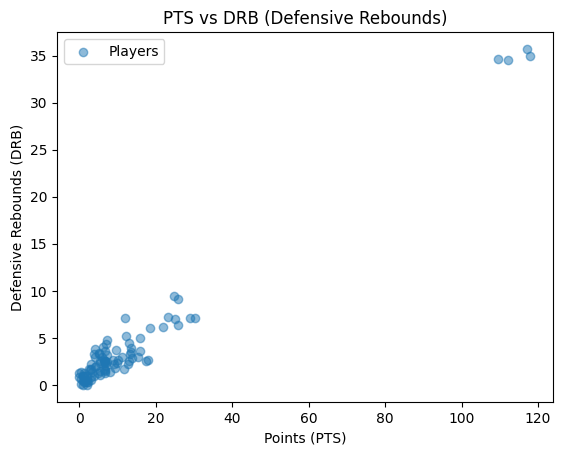

In [133]:
# Lists to store points and defensive rebounds data
pts_list = []
drb_list = []

# Loop through each year (2021-2024)
for year in range(2021, 2025):
    df = all_stats[year]
    
    # Convert PTS and DRB columns to numeric values
    df['pts'] = pd.to_numeric(df['PTS'], errors='coerce')
    df['drb'] = pd.to_numeric(df['DRB'], errors='coerce')
    
    # Drop rows with missing values in the relevant columns
    df_clean = df.dropna(subset=['pts', 'drb'])
    
    # Append cleaned data to the lists
    pts_list.extend(df_clean['pts'].tolist())
    drb_list.extend(df_clean['drb'].tolist())

# Create a new DataFrame to hold the combined data
data = pd.DataFrame({'pts': pts_list, 'drb': drb_list})

# Calculate the correlation between PTS and DRB
correlation = data.corr().loc['pts', 'drb']
print(f"Correlation between PTS and DRB: {correlation:.2f}")

# Plotting the relationship between PTS and DRB
plt.scatter(data['pts'], data['drb'], alpha=0.5, label="Players")
plt.title('PTS vs DRB (Defensive Rebounds)')
plt.xlabel('Points (PTS)')
plt.ylabel('Defensive Rebounds (DRB)')
plt.legend()
plt.show()

In [134]:
print("Yes, it does seem that players with a higher point average also have a higher amount of defensive rebounds.")

Yes, it does seem that players with a higher point average also have a higher amount of defensive rebounds.


# During the entire 2021-2024 Los Angeles Laker's regular seasons, which season did LeBron James have the highest average stats?

In [135]:
# Initialize a dictionary to hold LeBron's average stats per year
lebron_stats = {}

# Loop through each year (2021-2024)
for year in range(2021, 2025):
    df = all_stats[year]
    
    # Filter data for LeBron James (assuming the player is listed as 'LeBron James')
    lebron_data = df[df['Player'] == 'LeBron James']
    
    # Drop the columns are non-numeric
    lebron_data = lebron_data.drop(columns=['Rk', 'Player', 'Age', 'Pos'])
    
    # Convert the remaining columns to numeric, forcing errors to NaN
    lebron_data = lebron_data.apply(pd.to_numeric, errors='coerce')
    
    # Calculate the average stats for LeBron in the given year
    lebron_avg_stats = lebron_data.mean()
    
    # Store the average stats in the dictionary
    lebron_stats[year] = lebron_avg_stats

# Convert the dictionary to a DataFrame for easier comparison
lebron_stats_df = pd.DataFrame(lebron_stats).T

# Print LeBron's average stats for each year
print(lebron_stats_df)

# Find the year with the highest average for each stat (e.g., PTS, AST, REB)
highest_avg_year = lebron_stats_df.idxmax()

# Print the year with LeBron's highest average stats for each category
print("\nYear with LeBron James' highest average stats:")
print(highest_avg_year)

         G    GS    MP    FG   FGA    FG%   3P  3PA    3P%   2P  ...  BLK  \
2021  45.0  45.0  33.4   9.4  18.3  0.513  2.3  6.3  0.365  7.1  ...  0.6   
2022  56.0  56.0  37.2  11.4  21.8  0.524  2.9  8.0  0.359  8.6  ...  1.1   
2023  55.0  54.0  35.5  11.1  22.2  0.500  2.2  6.9  0.321  8.9  ...  0.6   
2024  71.0  71.0  35.3   9.6  17.9  0.540  2.1  5.1  0.410  7.5  ...  0.5   

      TOV   PF   PTS  Awards  Season   age  ast   pts  drb  
2021  3.7  1.6  25.0     NaN  2021.0  36.0  7.8  25.0  7.0  
2022  3.5  2.2  30.3     NaN  2022.0  37.0  6.2  30.3  7.1  
2023  3.2  1.6  28.9     NaN  2023.0  38.0  6.8  28.9  7.1  
2024  3.5  1.1  25.7     NaN  2024.0  39.0  8.3  25.7  6.4  

[4 rows x 31 columns]

Year with LeBron James' highest average stats:
G         2024.0
GS        2024.0
MP        2022.0
FG        2022.0
FGA       2023.0
FG%       2024.0
3P        2022.0
3PA       2022.0
3P%       2024.0
2P        2023.0
2PA       2023.0
2P%       2022.0
eFG%      2024.0
FT        2023.0


C:\Users\Ryan\AppData\Local\Temp\ipykernel_7032\3615937458.py:30: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  highest_avg_year = lebron_stats_df.idxmax()


In [136]:
print("After looking at the data, we can see that 2022 had the most amount of highest stats, being 8. 2024 was close behind at 6, 2023 at 5, and 2021 at 1.")

After looking at the data, we can see that 2022 had the most amount of highest stats, being 8. 2024 was close behind at 6, 2023 at 5, and 2021 at 1.


# When looking at LeBron James 2022 stats, which stat is an outliar compared to LeBron James' teammates during the 2022 regular season?

In [137]:
# Extract LeBron's stats for 2022
lebron_2022 = all_stats[2022].loc[all_stats[2022]['Player'] == 'LeBron James']

# Extract stats for LeBron's teammates for 2022 (excluding LeBron)
teammates_2022 = all_stats[2022][all_stats[2022]['Player'] != 'LeBron James']

# Define the stat columns we are comparing
stat_columns = ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'FG%', '3P%', 'FT%']

# Calculate the mean and standard deviation of each stat for the teammates
teammate_means = teammates_2022[stat_columns].mean()
teammate_stds = teammates_2022[stat_columns].std()

# Calculate the z-scores for LeBron's stats for 2022
lebron_stats = lebron_2022[stat_columns].values.flatten()  # LeBron's stats as a 1D array

z_scores = (lebron_stats - teammate_means) / teammate_stds

# Find the stat with the highest absolute z-score (this is the outlier stat)
outlier_stat_index = np.argmax(np.abs(z_scores))
outlier_stat = stat_columns[outlier_stat_index]
outlier_z_score = z_scores[outlier_stat_index]
outlier_std = teammate_stds[outlier_stat_index]

# Output the result
print(f"LeBron James' stat with the highest outlier z-score in 2022 is {outlier_stat} with a z-score of {outlier_z_score:.2f} and a standard deviation of {outlier_std:.2f}.")


LeBron James' stat with the highest outlier z-score in 2022 is PTS with a z-score of 0.87 and a standard deviation of 21.66.


C:\Users\Ryan\AppData\Local\Temp\ipykernel_7032\2709044011.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  outlier_z_score = z_scores[outlier_stat_index]
C:\Users\Ryan\AppData\Local\Temp\ipykernel_7032\2709044011.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  outlier_std = teammate_stds[outlier_stat_index]


In [138]:
print("This means that during the 2022 season, LeBron James had an average of 21.66 more points than his teammates per game during the regular season.")

This means that during the 2022 season, LeBron James had an average of 21.66 more points than his teammates per game during the regular season.
